In [1]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [2]:
with open(r"C:\Users\Shreya Kishor\SEM5\SE\intents.json") as file:
    data = json.load(file)
    
training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [3]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

In [4]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

In [5]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 12)                204       
                                                                 
Total params: 16,748
Trainable params: 16,748
Non-trainable params: 0
____________________________________________________

In [7]:
epochs = 700
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Epoch 1/700
2/2 [==============================] - 1s 5ms/step - loss: 2.4854 - accuracy: 0.0455
Epoch 2/700
2/2 [==============================] - 0s 4ms/step - loss: 2.4840 - accuracy: 0.1136
Epoch 3/700
2/2 [==============================] - 0s 0s/step - loss: 2.4832 - accuracy: 0.1591
Epoch 4/700
2/2 [==============================] - 0s 5ms/step - loss: 2.4822 - accuracy: 0.1591
Epoch 5/700
2/2 [==============================] - 0s 5ms/step - loss: 2.4813 - accuracy: 0.1591
Epoch 6/700
2/2 [==============================] - 0s 4ms/step - loss: 2.4804 - accuracy: 0.1591
Epoch 7/700
2/2 [==============================] - 0s 3ms/step - loss: 2.4796 - accuracy: 0.1591
Epoch 8/700
2/2 [==============================] - 0s 2ms/step - loss: 2.4789 - accuracy: 0.1591
Epoch 9/700
2/2 [==============================] - 0s 3ms/step - loss: 2.4782 - accuracy: 0.1591
Epoch 10/700
2/2 [==============================] - 0s 3ms/step - loss: 2.4773 - accuracy: 0.1591
Epoch 11/700
2/2 [============

2/2 [==============================] - 0s 3ms/step - loss: 2.2494 - accuracy: 0.2500
Epoch 85/700
2/2 [==============================] - 0s 5ms/step - loss: 2.2411 - accuracy: 0.2500
Epoch 86/700
2/2 [==============================] - 0s 2ms/step - loss: 2.2328 - accuracy: 0.2500
Epoch 87/700
2/2 [==============================] - 0s 4ms/step - loss: 2.2240 - accuracy: 0.2500
Epoch 88/700
2/2 [==============================] - 0s 3ms/step - loss: 2.2171 - accuracy: 0.2727
Epoch 89/700
2/2 [==============================] - 0s 4ms/step - loss: 2.2083 - accuracy: 0.3636
Epoch 90/700
2/2 [==============================] - 0s 4ms/step - loss: 2.2001 - accuracy: 0.3864
Epoch 91/700
2/2 [==============================] - 0s 4ms/step - loss: 2.1907 - accuracy: 0.3864
Epoch 92/700
2/2 [==============================] - 0s 5ms/step - loss: 2.1820 - accuracy: 0.3864
Epoch 93/700
2/2 [==============================] - 0s 3ms/step - loss: 2.1732 - accuracy: 0.3864
Epoch 94/700
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 1.4888 - accuracy: 0.4318
Epoch 168/700
2/2 [==============================] - 0s 3ms/step - loss: 1.4809 - accuracy: 0.4318
Epoch 169/700
2/2 [==============================] - 0s 3ms/step - loss: 1.4731 - accuracy: 0.4318
Epoch 170/700
2/2 [==============================] - 0s 2ms/step - loss: 1.4652 - accuracy: 0.4318
Epoch 171/700
2/2 [==============================] - 0s 5ms/step - loss: 1.4573 - accuracy: 0.4318
Epoch 172/700
2/2 [==============================] - 0s 4ms/step - loss: 1.4499 - accuracy: 0.4545
Epoch 173/700
2/2 [==============================] - 0s 5ms/step - loss: 1.4429 - accuracy: 0.4545
Epoch 174/700
2/2 [==============================] - 0s 3ms/step - loss: 1.4353 - accuracy: 0.4545
Epoch 175/700
2/2 [==============================] - 0s 3ms/step - loss: 1.4287 - accuracy: 0.4545
Epoch 176/700
2/2 [==============================] - 0s 5ms/step - loss: 1.4207 - accuracy: 0.4773
Epoch 177/700
2/2 [=====

2/2 [==============================] - 0s 5ms/step - loss: 0.9379 - accuracy: 0.7045
Epoch 250/700
2/2 [==============================] - 0s 4ms/step - loss: 0.9315 - accuracy: 0.7045
Epoch 251/700
2/2 [==============================] - 0s 3ms/step - loss: 0.9257 - accuracy: 0.7045
Epoch 252/700
2/2 [==============================] - 0s 6ms/step - loss: 0.9194 - accuracy: 0.7045
Epoch 253/700
2/2 [==============================] - 0s 3ms/step - loss: 0.9137 - accuracy: 0.7045
Epoch 254/700
2/2 [==============================] - 0s 4ms/step - loss: 0.9084 - accuracy: 0.7273
Epoch 255/700
2/2 [==============================] - 0s 3ms/step - loss: 0.9021 - accuracy: 0.7273
Epoch 256/700
2/2 [==============================] - 0s 4ms/step - loss: 0.8959 - accuracy: 0.7273
Epoch 257/700
2/2 [==============================] - 0s 4ms/step - loss: 0.8905 - accuracy: 0.7727
Epoch 258/700
2/2 [==============================] - 0s 3ms/step - loss: 0.8851 - accuracy: 0.7727
Epoch 259/700
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 0.5333 - accuracy: 0.8864
Epoch 332/700
2/2 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.9091
Epoch 333/700
2/2 [==============================] - 0s 5ms/step - loss: 0.5254 - accuracy: 0.9091
Epoch 334/700
2/2 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 0.9091
Epoch 335/700
2/2 [==============================] - 0s 4ms/step - loss: 0.5191 - accuracy: 0.9318
Epoch 336/700
2/2 [==============================] - 0s 4ms/step - loss: 0.5160 - accuracy: 0.9318
Epoch 337/700
2/2 [==============================] - 0s 3ms/step - loss: 0.5122 - accuracy: 0.9318
Epoch 338/700
2/2 [==============================] - 0s 4ms/step - loss: 0.5080 - accuracy: 0.9545
Epoch 339/700
2/2 [==============================] - 0s 3ms/step - loss: 0.5038 - accuracy: 0.9545
Epoch 340/700
2/2 [==============================] - 0s 4ms/step - loss: 0.5005 - accuracy: 0.9545
Epoch 341/700
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 0.2777 - accuracy: 1.0000
Epoch 414/700
2/2 [==============================] - 0s 4ms/step - loss: 0.2747 - accuracy: 0.9773
Epoch 415/700
2/2 [==============================] - 0s 2ms/step - loss: 0.2726 - accuracy: 0.9773
Epoch 416/700
2/2 [==============================] - 0s 3ms/step - loss: 0.2704 - accuracy: 0.9773
Epoch 417/700
2/2 [==============================] - 0s 3ms/step - loss: 0.2687 - accuracy: 0.9773
Epoch 418/700
2/2 [==============================] - 0s 3ms/step - loss: 0.2657 - accuracy: 0.9773
Epoch 419/700
2/2 [==============================] - 0s 3ms/step - loss: 0.2634 - accuracy: 1.0000
Epoch 420/700
2/2 [==============================] - 0s 3ms/step - loss: 0.2604 - accuracy: 1.0000
Epoch 421/700
2/2 [==============================] - 0s 3ms/step - loss: 0.2584 - accuracy: 1.0000
Epoch 422/700
2/2 [==============================] - 0s 4ms/step - loss: 0.2565 - accuracy: 1.0000
Epoch 423/700
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 0.1258 - accuracy: 1.0000
Epoch 496/700
2/2 [==============================] - 0s 4ms/step - loss: 0.1250 - accuracy: 1.0000
Epoch 497/700
2/2 [==============================] - 0s 3ms/step - loss: 0.1238 - accuracy: 1.0000
Epoch 498/700
2/2 [==============================] - 0s 3ms/step - loss: 0.1221 - accuracy: 1.0000
Epoch 499/700
2/2 [==============================] - 0s 3ms/step - loss: 0.1204 - accuracy: 1.0000
Epoch 500/700
2/2 [==============================] - 0s 4ms/step - loss: 0.1191 - accuracy: 1.0000
Epoch 501/700
2/2 [==============================] - 0s 3ms/step - loss: 0.1183 - accuracy: 1.0000
Epoch 502/700
2/2 [==============================] - 0s 3ms/step - loss: 0.1173 - accuracy: 1.0000
Epoch 503/700
2/2 [==============================] - 0s 6ms/step - loss: 0.1159 - accuracy: 1.0000
Epoch 504/700
2/2 [==============================] - 0s 4ms/step - loss: 0.1143 - accuracy: 1.0000
Epoch 505/700
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 0.0575 - accuracy: 1.0000
Epoch 578/700
2/2 [==============================] - 0s 5ms/step - loss: 0.0571 - accuracy: 1.0000
Epoch 579/700
2/2 [==============================] - 0s 4ms/step - loss: 0.0565 - accuracy: 1.0000
Epoch 580/700
2/2 [==============================] - 0s 2ms/step - loss: 0.0560 - accuracy: 1.0000
Epoch 581/700
2/2 [==============================] - 0s 5ms/step - loss: 0.0555 - accuracy: 1.0000
Epoch 582/700
2/2 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 1.0000
Epoch 583/700
2/2 [==============================] - 0s 4ms/step - loss: 0.0547 - accuracy: 1.0000
Epoch 584/700
2/2 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 1.0000
Epoch 585/700
2/2 [==============================] - 0s 4ms/step - loss: 0.0539 - accuracy: 1.0000
Epoch 586/700
2/2 [==============================] - 0s 4ms/step - loss: 0.0534 - accuracy: 1.0000
Epoch 587/700
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 0.0308 - accuracy: 1.0000
Epoch 660/700
2/2 [==============================] - 0s 5ms/step - loss: 0.0305 - accuracy: 1.0000
Epoch 661/700
2/2 [==============================] - 0s 5ms/step - loss: 0.0303 - accuracy: 1.0000
Epoch 662/700
2/2 [==============================] - 0s 4ms/step - loss: 0.0301 - accuracy: 1.0000
Epoch 663/700
2/2 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 1.0000
Epoch 664/700
2/2 [==============================] - 0s 4ms/step - loss: 0.0297 - accuracy: 1.0000
Epoch 665/700
2/2 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 1.0000
Epoch 666/700
2/2 [==============================] - 0s 5ms/step - loss: 0.0293 - accuracy: 1.0000
Epoch 667/700
2/2 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 1.0000
Epoch 668/700
2/2 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 1.0000
Epoch 669/700
2/2 [=====

In [8]:
# to save the trained model
model.save("chat_model")

import pickle

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model\assets


In [9]:
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama 
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

In [17]:
import cv2
from fer import FER
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from time import sleep 

def getEmotion():
    
    video=cv2.VideoCapture(0)

    a=0

    while True:
        a=a+1
        check, frame = video.read()
        sleep(1)
        cv2.imshow("Capturing",frame)

        if cv2.waitKey(1) & 0xFF==ord('q') or a==5:
            break

    showPic=cv2.imwrite("Photo.jpg",frame)


    video.release()
    cv2.destroyAllWindows

    input_image=cv2.imread('Photo.jpg')
    """
    try:
      filename = take_photo()
      print('Saved to {}'.format(filename))
  
      # Show the image which was just taken.
      # display(Image(filename))
    except Exception as err:
      # Errors will be thrown if the user does not have a webcam or if they do not
      # grant the page permission to access it.
      print(str(err))
    input_image=Image(filename)"""

    emotion_detector = FER(mtcnn=True)

    result=emotion_detector.detect_emotions(input_image)

    bounding_box=result[0]["box"]
    emotions = result[0]["emotions"]
    cv2.rectangle(input_image,(
      bounding_box[0], bounding_box[1]),(
      bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
                  (0, 155, 255), 2,)

    emotion_name, score = emotion_detector.top_emotion(input_image)
    for index, (emotion_name, score) in enumerate(emotions.items()):
        color = (211, 211,211) if score < 0.01 else (255, 0, 0)
        emotion_score = "{}: {}".format(emotion_name, "{:.2f}".format(score))

        cv2.putText(input_image,emotion_score,
    			(bounding_box[0], bounding_box[1] + bounding_box[3] + 30 + index * 15),
    			cv2.FONT_HERSHEY_SIMPLEX,0.5,color,1,cv2.LINE_AA,)
        # print(emotion_name)
        print(emotion_score)
    #Save the result in new image file
    cv2.imwrite("emotion.jpg", input_image)

    # Read image file using matplotlib's image module
    result_image = mpimg.imread('emotion.jpg')
    imgplot = plt.imshow(result_image)
    # Display Output Image
    plt.show()

Start messaging with the bot (type quit to stop)!
User: hi
1/1 [==============================] - 0s 67ms/step
ChatBot: Hi
User: pose
1/1 [==============================] - 0s 32ms/step
angry: 0.02
disgust: 0.00
fear: 0.01
happy: 0.93
sad: 0.02
surprise: 0.01
neutral: 0.02


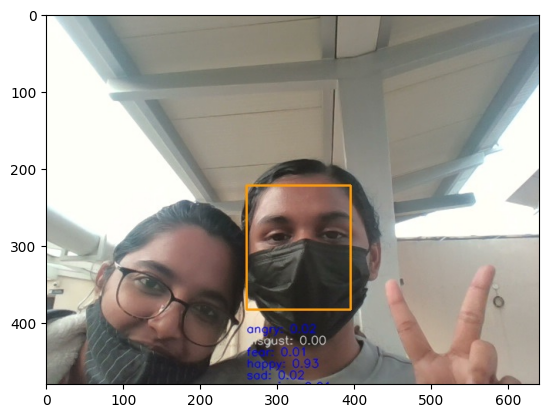

In [19]:
with open(r"C:\Users\Shreya Kishor\SEM5\SE\intents.json") as file:
    data = json.load(file)


def chat():
    # load trained model
    model = keras.models.load_model('chat_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20
    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "pose":
            getEmotion()
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])

        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()